In [1051]:
import pandas as pd
import os  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [1052]:
cwd = os.getcwd()
print(cwd)

/Users/Reinhard/702_Statistical_Modelling_Final_Project


In [1053]:
os.chdir('/Users/Reinhard/702_Statistical_Modelling_Final_Project')#更改路径，''里面为更改的路径
 
print(os.getcwd())#显示当前路径

/Users/Reinhard/702_Statistical_Modelling_Final_Project


In [1054]:
df = pd.read_csv("/Users/Reinhard/702_Statistical_Modelling_Final_Project/dataset/raw_haidian.csv")

In [1055]:
df.head()

,Unnamed: 0,Housing ID,Livable Area,Price/Square Meter,Price,Transaction Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号 2室1厅 56.3平米,56.3平米,38544.0,217.0,2015-05-08,1965年建板楼,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号 2室1厅 55.1平米,55.1平米,33667.0,185.5,2012-04-10,1965年建板楼,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院 2室1厅 70平米,70平米,91429.0,640.0,2019-04-19,1993年建板塔结合,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院 2室1厅 98.49平米,98.49平米,102752.0,1012.0,2019-04-07,2000年建塔楼,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院 2室1厅 60.7平米,60.7平米,98847.0,600.0,2019-02-22,1991年建板塔结合,2室1厅,南,高楼层(共16层),其他


In [1056]:
df.columns

Index(['Unnamed: 0', 'Housing ID', 'Livable Area', 'Price/Square Meter',
       'Price', 'Transaction Date', 'Year Built', 'Floor Plan',
       'Facing Direction', 'Floor', 'Decoration'],
      dtype='object')

In [1057]:
df.dtypes

Unnamed: 0              int64
Housing ID             object
Livable Area           object
Price/Square Meter    float64
Price                 float64
Transaction Date       object
Year Built             object
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1058]:
df['Housing ID'] = df['Housing ID'].str.split(pat = ' ')

In [1059]:
df['Housing ID'].head()

0      [中关村南大街甲3号, 2室1厅, 56.3平米]
1      [中关村南大街甲3号, 2室1厅, 55.1平米]
2       [民族大学南路19号院, 2室1厅, 70平米]
3    [民族大学南路19号院, 2室1厅, 98.49平米]
4     [民族大学南路19号院, 2室1厅, 60.7平米]
Name: Housing ID, dtype: object

In [1060]:
type(df['Housing ID'].iloc[0])

list

In [1061]:
df.shape

(72435, 11)

In [1062]:
df.isnull().sum()

Unnamed: 0             0
Housing ID             0
Livable Area           0
Price/Square Meter     0
Price                  0
Transaction Date       0
Year Built             0
Floor Plan             0
Facing Direction      62
Floor                  0
Decoration             0
dtype: int64

In [1063]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
72430    0
72431    0
72432    0
72433    0
72434    0
Length: 72435, dtype: int64

In [1064]:
df.isnull().sum(axis=0)

Unnamed: 0             0
Housing ID             0
Livable Area           0
Price/Square Meter     0
Price                  0
Transaction Date       0
Year Built             0
Floor Plan             0
Facing Direction      62
Floor                  0
Decoration             0
dtype: int64

In [1065]:
df[df.isna().T.any()].head(60)

,Unnamed: 0,Housing ID,Livable Area,Price/Square Meter,Price,Transaction Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
620,621,"[万寿寺北里, 3室1厅1卫]",56.9平米,77153.0,439.0,2017-03-11,暂无信息,3室1厅,NaN,暂无信息,暂无信息
4222,4223,"[公交党校宿舍, 2室1厅1卫]",67.81平米,68869.0,467.0,2018-05-01,暂无信息,2室1厅,NaN,暂无信息,暂无信息
5097,5098,"[永泰东里, 3室1厅1卫]",70.98平米,62835.0,446.0,2018-08-13,暂无信息,3室1厅,NaN,暂无信息,暂无信息
5128,5129,"[永泰东里, 1室1厅1卫]",58.91平米,60771.0,358.0,2018-05-01,暂无信息,1室1厅,NaN,暂无信息,暂无信息
5848,5849,"[后屯路32号院, 2室1厅1卫]",60.49平米,67780.0,410.0,2017-07-17,暂无信息,2室1厅,NaN,暂无信息,暂无信息
8307,8308,"[永泰庄6号院, 2室1厅1卫]",57.48平米,65240.0,375.0,2017-11-19,暂无信息,2室1厅,NaN,暂无信息,暂无信息
11346,11347,"[东南小区, 3室1厅1卫]",111.87平米,98150.0,1098.0,2018-06-03,暂无信息,3室1厅,NaN,暂无信息,暂无信息
11364,11365,"[东南小区, 3室1厅1卫]",111.87平米,94753.0,1060.0,2018-04-26,暂无信息,3室1厅,NaN,暂无信息,暂无信息
11388,11389,"[东南小区, 3室1厅1卫]",71.7平米,113808.0,816.0,2017-12-24,暂无信息,3室1厅,NaN,暂无信息,暂无信息
11414,11415,"[东南小区, 3室1厅1卫]",71.7平米,122734.0,880.0,2017-07-26,暂无信息,3室1厅,NaN,暂无信息,暂无信息


In [1066]:
for i in range(len(df['Housing ID'])):
    df['Housing ID'].iloc[i] = df['Housing ID'].iloc[i][0]

/Users/Reinhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [1067]:
df['Housing ID'].unique()

array(['中关村南大街甲3号', '民族大学南路19号院', '魏公村小区', ..., '青云北区', '知春里', '双榆树东里'],
      dtype=object)

In [1068]:
df['Housing ID'].value_counts()

育新花园        888
小南庄社区       731
永泰东里        711
保利西山林语      584
八里庄北里       532
           ... 
花园北路36号院      1
华北北楼          1
海澜中苑          1
西山美墅馆公建       1
光耀东方峰会        1
Name: Housing ID, Length: 1126, dtype: int64

In [1069]:
df.head()

,Unnamed: 0,Housing ID,Livable Area,Price/Square Meter,Price,Transaction Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.3平米,38544.0,217.0,2015-05-08,1965年建板楼,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号,55.1平米,33667.0,185.5,2012-04-10,1965年建板楼,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院,70平米,91429.0,640.0,2019-04-19,1993年建板塔结合,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院,98.49平米,102752.0,1012.0,2019-04-07,2000年建塔楼,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院,60.7平米,98847.0,600.0,2019-02-22,1991年建板塔结合,2室1厅,南,高楼层(共16层),其他


In [1070]:
df = df.rename(columns={"Transaction Date": "Date", "Housing ID": "Community Name", "Unnamed: 0": 'Transaction_ID'})

In [1071]:
# Original size of the dataframe
df.shape

(72435, 11)

In [1072]:
df.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.3平米,38544.0,217.0,2015-05-08,1965年建板楼,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号,55.1平米,33667.0,185.5,2012-04-10,1965年建板楼,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院,70平米,91429.0,640.0,2019-04-19,1993年建板塔结合,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院,98.49平米,102752.0,1012.0,2019-04-07,2000年建塔楼,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院,60.7平米,98847.0,600.0,2019-02-22,1991年建板塔结合,2室1厅,南,高楼层(共16层),其他


In [1073]:
# Livable Area convert into float

df['Livable Area'] = df['Livable Area'].astype('str').str[:-2]

In [1074]:
df['Livable Area'] = df['Livable Area'].astype(float)

In [1075]:
df.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built             object
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1076]:
df['Livable Area'].value_counts()

63.10     323
61.60     238
60.00     226
58.00     213
58.20     208
         ... 
213.28      1
216.94      1
120.76      1
339.63      1
107.16      1
Name: Livable Area, Length: 10492, dtype: int64

In [1077]:
df['Livable Area'].unique()

array([56.3 , 55.1 , 70.  , ..., 69.06, 54.01, 48.03])

In [1078]:
df.shape

(72435, 11)

In [1079]:
type(df['Year Built'])

pandas.core.series.Series

In [1080]:
# Keep the first 4 digits for 'Year Built' 
df['Year Built'] = df['Year Built'].astype('str').str[0:4]

In [1081]:
df['Year Built'].unique()

array(['1965', '1993', '2000', '1991', '1985', '1989', '1984', '1982',
       '1983', '1988', '1979', '1981', '1980', '1997', '1996', '1995',
       '1998', '2007', '1994', '暂无信息', '1990', '1999', '板楼', '2003',
       '2004', '暂无数据', '板塔结合', '2002', '1978', '1986', '2001', '1992',
       '2012', '2010', '2014', '2011', '2013', '2016', '1987', '2005',
       '2008', '2009', '1976', '1963', '2015', '塔楼', '2006', '1975',
       '2018', '2017', '1950', '1970', '1967', '1960', '1973', '1959',
       '1962', '1968', '1958', '1977', '1957', '1961', '1974', '1956',
       '1964', '1955', '1966', '底层(共', '1954', '1972', '平房'], dtype=object)

In [1082]:
df['Year Built'].value_counts()

1998    4522
2000    4084
2004    3656
1990    3327
1996    3279
        ... 
1961       3
1972       2
1950       2
平房         1
底层(共       1
Name: Year Built, Length: 71, dtype: int64

In [1083]:
# Encode Decoration into categorical variables
# 毛坯 = 0，简装 = 0， 精装 = 1，  其他 = 0 (we need to drop 暂无信息)
from numpy import nan as NaN

df.loc[df['Year Built'] == '暂无信息', 'Year Built'] = NaN
df.loc[df['Year Built'] == '板楼' , 'Year Built'] = NaN
df.loc[df['Year Built'] == '暂无数据', 'Year Built'] = NaN
df.loc[df['Year Built'] == '板塔结合', 'Year Built'] = NaN
df.loc[df['Year Built'] == '塔楼', 'Year Built'] = NaN
df.loc[df['Year Built'] == '底层(共' , 'Year Built'] = NaN
df.loc[df['Year Built'] == '平房', 'Year Built'] = NaN


In [1084]:
df.isnull().sum()

Transaction_ID           0
Community Name           0
Livable Area             0
Price/Square Meter       0
Price                    0
Date                     0
Year Built            7159
Floor Plan               0
Facing Direction        62
Floor                    0
Decoration               0
dtype: int64

In [1085]:
df[df.isna().T.any()]

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
256,257,法华寺小区,47.56,87679.0,417.0,2017-09-18,NaN,1室1厅,西,暂无信息,暂无信息
257,258,法华寺小区,73.51,87063.0,640.0,2017-03-07,NaN,2室1厅,东北,暂无信息,暂无信息
274,275,广源闸,43.08,86351.0,372.0,2018-04-29,NaN,1室1厅,南,暂无信息,暂无信息
275,276,广源闸,55.44,85678.0,475.0,2018-04-28,NaN,2室1厅,南,暂无信息,暂无信息
286,287,民族印刷厂宿舍,50.50,106535.0,538.0,2017-09-15,NaN,2室1厅,南,暂无信息,暂无信息
...,...,...,...,...,...,...,...,...,...,...,...
72144,72145,双榆树东里,64.00,90000.0,576.0,2017-02-18,NaN,2室1厅,西北,暂无信息,暂无信息
72147,72148,双榆树东里,66.90,92377.0,618.0,2017-01-18,NaN,3室1厅,南北,暂无信息,暂无信息
72149,72150,双榆树东里,50.80,98031.0,498.0,2017-01-09,NaN,2室1厅,南北,暂无信息,暂无信息
72151,72152,双榆树东里,70.30,92461.0,650.0,2017-01-08,NaN,3室1厅,南北,暂无信息,暂无信息


In [1086]:
# df1 = df[df['Year Built'] != '暂无信息']
# df1 = df1[df['Year Built'] != '板楼']
# df1 = df1[df['Year Built'] != '暂无数据']
# df1 = df1[df['Year Built'] != '板塔结合']
# df1 = df1[df['Year Built'] != '塔楼']
# df1 = df1[df['Year Built'] != '底层(共']
# df1 = df1[df['Year Built'] != '平房']

In [1087]:
df['Year Built'].unique()

array(['1965', '1993', '2000', '1991', '1985', '1989', '1984', '1982',
       '1983', '1988', '1979', '1981', '1980', '1997', '1996', '1995',
       '1998', '2007', '1994', nan, '1990', '1999', '2003', '2004',
       '2002', '1978', '1986', '2001', '1992', '2012', '2010', '2014',
       '2011', '2013', '2016', '1987', '2005', '2008', '2009', '1976',
       '1963', '2015', '2006', '1975', '2018', '2017', '1950', '1970',
       '1967', '1960', '1973', '1959', '1962', '1968', '1958', '1977',
       '1957', '1961', '1974', '1956', '1964', '1955', '1966', '1954',
       '1972'], dtype=object)

In [1088]:
# df['Year Built'] = df['Year Built'].astype(int)

In [1089]:
type(df['Year Built'])

pandas.core.series.Series

In [1090]:
df.shape

(72435, 11)

In [1091]:
df.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,1965,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,1965,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,1993,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,2000,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,1991,2室1厅,南,高楼层(共16层),其他


In [1092]:
df.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built             object
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1093]:
df['Year Built'].sort_values()

34869    1950
12664    1950
56206    1954
55696    1954
61972    1954
         ... 
72144     NaN
72147     NaN
72149     NaN
72151     NaN
72423     NaN
Name: Year Built, Length: 72435, dtype: object

In [1094]:
df[df.isna().T.any()]

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
256,257,法华寺小区,47.56,87679.0,417.0,2017-09-18,NaN,1室1厅,西,暂无信息,暂无信息
257,258,法华寺小区,73.51,87063.0,640.0,2017-03-07,NaN,2室1厅,东北,暂无信息,暂无信息
274,275,广源闸,43.08,86351.0,372.0,2018-04-29,NaN,1室1厅,南,暂无信息,暂无信息
275,276,广源闸,55.44,85678.0,475.0,2018-04-28,NaN,2室1厅,南,暂无信息,暂无信息
286,287,民族印刷厂宿舍,50.50,106535.0,538.0,2017-09-15,NaN,2室1厅,南,暂无信息,暂无信息
...,...,...,...,...,...,...,...,...,...,...,...
72144,72145,双榆树东里,64.00,90000.0,576.0,2017-02-18,NaN,2室1厅,西北,暂无信息,暂无信息
72147,72148,双榆树东里,66.90,92377.0,618.0,2017-01-18,NaN,3室1厅,南北,暂无信息,暂无信息
72149,72150,双榆树东里,50.80,98031.0,498.0,2017-01-09,NaN,2室1厅,南北,暂无信息,暂无信息
72151,72152,双榆树东里,70.30,92461.0,650.0,2017-01-08,NaN,3室1厅,南北,暂无信息,暂无信息


In [1095]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
72430    0
72431    0
72432    0
72433    0
72434    0
Length: 72435, dtype: int64

In [1096]:
# df1['Year Built'] = 2019 - df1['Year Built']

In [1097]:
# df1['Year Built'].sort_values()

In [1098]:
df['Decoration'].unique()

array(['简装', '其他', '精装', '毛坯', '暂无信息'], dtype=object)

In [1099]:
df['Decoration'].value_counts()

精装      26202
简装      21363
其他      20922
暂无信息     2940
毛坯       1008
Name: Decoration, dtype: int64

In [1100]:
# Encode Decoration into categorical variables
# 毛坯 = 0，简装 = 0， 精装 = 1，  其他 = 0 (we need to drop 暂无信息)
df.loc[df['Decoration'] == '毛坯' , 'Decoration'] = 'bare'
df.loc[df['Decoration'] == '简装' , 'Decoration'] = 'simple'
df.loc[df['Decoration'] == '精装' , 'Decoration'] = 'refined'
df.loc[df['Decoration'] == '其他' , 'Decoration'] = 'other'
df.loc[df['Decoration'] == '暂无信息' , 'Decoration'] = NaN

In [1101]:
df['Decoration'].unique()

array(['simple', 'other', 'refined', 'bare', nan], dtype=object)

In [1102]:
df['Decoration'].isnull().sum()

2940

In [1103]:
# df1['Decoration'] = df1['Decoration'].astype(int)

In [1104]:
# df1.dtypes

In [1105]:
# df1.head()

In [1106]:
df['Floor'].unique()

array(['低楼层(共3层)', '底层(共3层)', '中楼层(共15层)', '高楼层(共18层)', '高楼层(共16层)',
       '低楼层(共18层)', '中楼层(共18层)', '高楼层(共6层)', '顶层(共15层)', '中楼层(共16层)',
       '低楼层(共15层)', '高楼层(共15层)', '底层(共15层)', '低楼层(共6层)', '中楼层(共6层)',
       '底层(共16层)', '顶层(共18层)', '顶层(共6层)', '低楼层(共16层)', '底层(共5层)',
       '顶层(共5层)', '中楼层(共5层)', '顶层(共16层)', '中楼层(共14层)', '低楼层(共14层)',
       '顶层(共14层)', '高楼层(共14层)', '底层(共6层)', '高楼层(共11层)', '低楼层(共11层)',
       '中楼层(共11层)', '底层(共11层)', '暂无信息', '底层(共18层)', '高楼层(共24层)',
       '顶层(共24层)', '低楼层(共24层)', '中楼层(共24层)', '底层(共12层)', '高楼层(共12层)',
       '低楼层(共12层)', '中楼层(共12层)', '顶层(共12层)', '中楼层(共20层)', '高楼层(共20层)',
       '低楼层(共20层)', '中楼层(共25层)', '高楼层(共25层)', '低楼层(共25层)', '低楼层(共10层)',
       '中楼层(共10层)', '底层(共14层)', '高楼层(共10层)', '底层(共9层)', '顶层(共9层)',
       '高楼层(共9层)', '低楼层(共9层)', '中楼层(共9层)', '中楼层(共23层)', '高楼层(共17层)',
       '低楼层(共22层)', '中楼层(共22层)', '高楼层(共23层)', '低楼层(共23层)', '高楼层(共22层)',
       '底层(共23层)', '顶层(共23层)', '顶层(共22层)', '底层(共4层)', '中楼层(共4层)',
       '中楼层(共7层)', '底层(共7层)', '低楼层(共7

In [1107]:
df['Floor'] = df['Floor'].str[0:1]

In [1108]:
df['Floor'].unique()

array(['低', '底', '中', '高', '顶', '暂', '地', '未'], dtype=object)

In [1109]:
df['Floor'].value_counts()

中    26273
高    13979
低    13448
顶     8630
底     6618
暂     2940
地      365
未      182
Name: Floor, dtype: int64

In [1110]:
df['Floor'].count()

72435

In [1111]:
# df2 = df1[df1['Floor'] != '未']

In [1112]:
# df2['Floor'].count()

In [1113]:
df2 = df

In [1114]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)
df2.loc[df2['Floor'] == '地' , 'Floor'] = 'basement'
df2.loc[df2['Floor'] == '底' , 'Floor'] = 'first'
df2.loc[df2['Floor'] == '低' , 'Floor'] = 'low'
df2.loc[df2['Floor'] == '中' , 'Floor'] = 'middle'
df2.loc[df2['Floor'] == '高' , 'Floor'] = 'high'
df2.loc[df2['Floor'] == '顶' , 'Floor'] = 'top'
df2.loc[df2['Floor'] == '暂' , 'Floor'] = NaN
df2.loc[df2['Floor'] == '未' , 'Floor'] = NaN

# df2['Floor'] = df2['Floor'].astype(int)

In [1115]:
df2.isnull().sum()

Transaction_ID           0
Community Name           0
Livable Area             0
Price/Square Meter       0
Price                    0
Date                     0
Year Built            7159
Floor Plan               0
Facing Direction        62
Floor                 3122
Decoration            2940
dtype: int64

In [1116]:
df2.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,1965,2室1厅,南 北,low,simple
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,1965,2室1厅,南 北,first,other
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,1993,2室1厅,南,middle,simple
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,2000,2室1厅,南,high,simple
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,1991,2室1厅,南,high,other


In [1117]:
df2['Floor'].isnull().sum()

3122

In [1118]:
df2['Facing Direction'].unique()

array(['南 北', '南', '东北', '东 南 西北', '西南', '东 西 北', '西 南', '东 南 北', '东 西',
       '东 南', '东 南 西', '东', '北', '东南', '西北', '东 西南', '西 北', '南 西', '东 北',
       '西', '东南 北', '西南 北', '东 西北', '南北', '南 西 北', '东西', nan, '东南 西',
       '东南 西北', '东 南 西 北', '西 南 北', '北 西南', '西南 东北', '西 东北', '东南 南 西南',
       '东 东北', '北 东北', '北 南', '南 东北', '南 北 东', '南 北 东北', '西 西北 北',
       '西 西南 南', '东 东南 北', '东 东南 南', '南 北 西', '南 西南', '西 东南', '南 西北',
       '东南 南', '东 东南', '南 东', '西南 西', '暂无数据', '东 西 南', '东南 东', '北 东南',
       '东 北 东北', '东 西 南 北', '东南 东北', '西 西北', '东南 西南', '东 南 西南', '东 北 西南',
       '西北 东北', '西南 西北', '南 北 东 西', '西 东', '南 东南', '西 北 南', '南 西南 西',
       '西北 北', '南 西 西北', '西 西南', '北 西北', '东 西南 北', '东南 南 北', '东 西北 北 东北',
       '东南 西 北', '西南 西 南', '南 东 西', '南 西南 北', '西 西北 南', '东 南 东南', '东北 南',
       '南 西南 东北', '西北 东南'], dtype=object)

In [1119]:
df2['Facing Direction'].value_counts()

南 北        29057
南          13541
东           3733
东 西         3229
西           2662
           ...  
南 西南 东北        1
南 西南 北         1
东北 南           1
东 南 东南         1
南 东 西          1
Name: Facing Direction, Length: 86, dtype: int64

In [1120]:
df2[df2['Facing Direction'].str.contains('南')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [1121]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)
df2.loc[df2['Facing Direction'].astype(str).str.contains('南'), 'Facing Direction'] = 'South'
df2.loc[df2['Facing Direction'].astype(str).str.contains('北'), 'Facing Direction'] = 'North'
df2.loc[df2['Facing Direction'].astype(str).str.contains('东'), 'Facing Direction'] = 'East/West'
df2.loc[df2['Facing Direction'].astype(str).str.contains('西'), 'Facing Direction'] = 'East/West'

# df2['Floor'] = df2['Floor'].astype(int)

In [1122]:
df2['Facing Direction'].unique()

array(['South', 'North', 'East/West', nan, '暂无数据'], dtype=object)

In [1123]:
df2['Facing Direction'].value_counts()

South        56001
East/West     9773
North         6590
暂无数据             9
Name: Facing Direction, dtype: int64

In [1124]:
df2.loc[df2['Facing Direction'] == '暂无数据' , 'Facing Direction'] = NaN
df2.loc[df2['Facing Direction'].isnull() , 'Facing Direction'] = NaN

In [1125]:
df2.isnull().sum()

Transaction_ID           0
Community Name           0
Livable Area             0
Price/Square Meter       0
Price                    0
Date                     0
Year Built            7159
Floor Plan               0
Facing Direction        71
Floor                 3122
Decoration            2940
dtype: int64

In [1126]:
df2[df2['Facing Direction'].isnull()]

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
620,621,万寿寺北里,56.90,77153.0,439.0,2017-03-11,NaN,3室1厅,NaN,NaN,NaN
4222,4223,公交党校宿舍,67.81,68869.0,467.0,2018-05-01,NaN,2室1厅,NaN,NaN,NaN
5097,5098,永泰东里,70.98,62835.0,446.0,2018-08-13,NaN,3室1厅,NaN,NaN,NaN
5128,5129,永泰东里,58.91,60771.0,358.0,2018-05-01,NaN,1室1厅,NaN,NaN,NaN
5848,5849,后屯路32号院,60.49,67780.0,410.0,2017-07-17,NaN,2室1厅,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68616,68617,蓟门东里,62.00,31613.0,196.0,2012-05-31,1986,2室1厅,NaN,first,other
68855,68856,太极小区,81.30,94096.0,765.0,2017-05-28,NaN,3室1厅,NaN,NaN,NaN
70257,70258,双榆树北里,71.99,96388.0,693.0,2018-06-23,NaN,3室1厅,NaN,NaN,NaN
70261,70262,双榆树北里,62.50,103680.0,648.0,2018-06-09,NaN,3室1厅,NaN,NaN,NaN


In [1127]:
df2['Facing Direction'].value_counts()

South        56001
East/West     9773
North         6590
Name: Facing Direction, dtype: int64

In [1128]:
# df3 = df2[df2['Facing Direction'] != '暂无数据']

In [1129]:
df2['Facing Direction'].count()

72364

In [1130]:
df2.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,1965,2室1厅,South,low,simple
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,1965,2室1厅,South,first,other
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,1993,2室1厅,South,middle,simple
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,2000,2室1厅,South,high,simple
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,1991,2室1厅,South,high,other


In [1131]:
df2.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built             object
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1132]:
# # df = pd.get_dummies(df,columns=['Facing Direction2'])
# # Drop missing rows for facing direction2 (dropped 71 rows)
# df2 = df[(df['Facing Direction2_n'] != 1) & (df['Facing Direction2_暂'] != 1)]
# df2.shape

# # Drop unnecessary columns for facing direction2_n and facing direction2_暂
# df2 = df2.drop(columns=["Facing Direction2_n", "Facing Direction2_暂"])

In [1133]:
df3 = df2

In [1134]:
df3['Floor Plan'].unique()

array(['2室1厅', '3室1厅', '3室2厅', '1室1厅', '2室0厅', '3室0厅', '1室0厅', '4室1厅',
       '4室2厅', '2室2厅', '4室0厅', '5室1厅', '1室2厅', '3室3厅', '6室1厅', '6室2厅',
       '5室2厅', '4室3厅', '5室3厅', '6室3厅', '2室3厅', '5室4厅', '4室4厅', '0室0厅',
       '1房间1卫', '3房间1卫', '2房间1卫', '1房间0卫', '6室4厅', '4房间2卫', '2房间0卫',
       '5房间3卫', '5房间2卫', '4室5厅', '7室3厅', '9室0厅', '8室4厅', '7室2厅', '--室--厅',
       '2房间2卫', '5室0厅', '3房间2卫', '4室9厅'], dtype=object)

In [1135]:
df3['Floor Plan'].count()

72435

In [1136]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)

# df_clear = df.drop(df[df['x']<0.01].index)

df4 = df3.drop(df3[df3['Floor Plan'].astype(str).str.contains('房间')].index)

In [1137]:
df4['Floor Plan'].unique()

array(['2室1厅', '3室1厅', '3室2厅', '1室1厅', '2室0厅', '3室0厅', '1室0厅', '4室1厅',
       '4室2厅', '2室2厅', '4室0厅', '5室1厅', '1室2厅', '3室3厅', '6室1厅', '6室2厅',
       '5室2厅', '4室3厅', '5室3厅', '6室3厅', '2室3厅', '5室4厅', '4室4厅', '0室0厅',
       '6室4厅', '4室5厅', '7室3厅', '9室0厅', '8室4厅', '7室2厅', '--室--厅', '5室0厅',
       '4室9厅'], dtype=object)

In [1138]:
df4['Floor Plan'].count()

72391

In [1139]:
df5 = df4[df4['Floor Plan'] != '--室--厅']

In [1140]:
df5['Floor Plan'].count()

72387

In [1141]:
df5.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,1965,2室1厅,South,low,simple
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,1965,2室1厅,South,first,other
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,1993,2室1厅,South,middle,simple
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,2000,2室1厅,South,high,simple
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,1991,2室1厅,South,high,other


In [1142]:
df5['Floor Plan'].unique()

array(['2室1厅', '3室1厅', '3室2厅', '1室1厅', '2室0厅', '3室0厅', '1室0厅', '4室1厅',
       '4室2厅', '2室2厅', '4室0厅', '5室1厅', '1室2厅', '3室3厅', '6室1厅', '6室2厅',
       '5室2厅', '4室3厅', '5室3厅', '6室3厅', '2室3厅', '5室4厅', '4室4厅', '0室0厅',
       '6室4厅', '4室5厅', '7室3厅', '9室0厅', '8室4厅', '7室2厅', '5室0厅', '4室9厅'],
      dtype=object)

In [1143]:
df5['Floor Plan'].value_counts()

2室1厅    32460
1室1厅    14321
3室1厅    10366
3室2厅     5593
2室2厅     4245
1室0厅     2620
4室2厅     1188
4室1厅      371
3室0厅      311
2室0厅      307
1室2厅      219
5室2厅      123
4室3厅       74
5室3厅       53
3室3厅       35
6室2厅       29
4室0厅       19
5室1厅       15
6室3厅       12
5室4厅        5
6室1厅        3
8室4厅        3
4室4厅        3
2室3厅        3
7室2厅        2
9室0厅        1
6室4厅        1
4室9厅        1
5室0厅        1
0室0厅        1
4室5厅        1
7室3厅        1
Name: Floor Plan, dtype: int64

In [1144]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)
df5.loc[df5['Floor Plan'] == '2室1厅' , 'Floor Plan'] = '2B'
df5.loc[df5['Floor Plan'] == '3室1厅' , 'Floor Plan'] = '3B'
df5.loc[df5['Floor Plan'] == '3室2厅' , 'Floor Plan'] = '3B'
df5.loc[df5['Floor Plan'] == '1室1厅' , 'Floor Plan'] = '1B'
df5.loc[df5['Floor Plan'] == '2室0厅' , 'Floor Plan'] = '2B'
df5.loc[df5['Floor Plan'] == '3室0厅' , 'Floor Plan'] = '3B'
df5.loc[df5['Floor Plan'] == '1室0厅' , 'Floor Plan'] = '1B'
df5.loc[df5['Floor Plan'] == '4室1厅' , 'Floor Plan'] = '4B or above'

df5.loc[df5['Floor Plan'] == '4室2厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '2室2厅' , 'Floor Plan'] = '2B'
df5.loc[df5['Floor Plan'] == '4室0厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '5室1厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '1室2厅' , 'Floor Plan'] = '1B'
df5.loc[df5['Floor Plan'] == '3室3厅' , 'Floor Plan'] = '3B'
df5.loc[df5['Floor Plan'] == '6室1厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '6室2厅' , 'Floor Plan'] = '4B or above'

df5.loc[df5['Floor Plan'] == '5室2厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '4室3厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '5室3厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '6室3厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '2室3厅' , 'Floor Plan'] = '2B'
df5.loc[df5['Floor Plan'] == '5室4厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '4室4厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '0室0厅' , 'Floor Plan'] = '0B'

df5.loc[df5['Floor Plan'] == '6室4厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '4室5厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '7室3厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '9室0厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '8室4厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '7室2厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '5室0厅' , 'Floor Plan'] = '4B or above'
df5.loc[df5['Floor Plan'] == '4室9厅' , 'Floor Plan'] = '4B or above'

/Users/Reinhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1145]:
df5['Floor Plan'].unique()

array(['2B', '3B', '1B', '4B or above', '0B'], dtype=object)

In [1146]:
df5['Floor Plan'].value_counts()

2B             37015
1B             17160
3B             16305
4B or above     1906
0B                 1
Name: Floor Plan, dtype: int64

In [1147]:
df6 = df5[df5['Floor Plan'] != '0B']

In [1148]:
df6 = df6.rename(columns={"Floor": "Floor Level", "Price/Square Meter": "Price/Sqmt"})

In [1149]:
df6['Floor Plan'].value_counts()

2B             37015
1B             17160
3B             16305
4B or above     1906
Name: Floor Plan, dtype: int64

In [1150]:
# get a list of columns
cols = list(df5)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Price/Sqmt')))
cols

ValueError: 'Price/Sqmt' is not in list

In [1151]:
df6 = df6[cols]

KeyError: "['Price/Square Meter', 'Floor'] not in index"

In [1152]:
df6.head()

,Transaction_ID,Community Name,Livable Area,Price/Sqmt,Price,Date,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,1965,2B,South,low,simple
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,1965,2B,South,first,other
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,1993,2B,South,middle,simple
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,2000,2B,South,high,simple
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,1991,2B,South,high,other


In [1153]:
df6.dtypes

Transaction_ID        int64
Community Name       object
Livable Area        float64
Price/Sqmt          float64
Price               float64
Date                 object
Year Built           object
Floor Plan           object
Facing Direction     object
Floor Level          object
Decoration           object
dtype: object

In [1154]:
# Convert dtype of Transaction Date
df6['Date'] = pd.to_datetime(df6.Date)

In [1155]:
df6.dtypes

Transaction_ID               int64
Community Name              object
Livable Area               float64
Price/Sqmt                 float64
Price                      float64
Date                datetime64[ns]
Year Built                  object
Floor Plan                  object
Facing Direction            object
Floor Level                 object
Decoration                  object
dtype: object

In [1156]:
df6 = df6.set_index(['Date'])

In [1157]:
df6['2018-01-04']

,Transaction_ID,Community Name,Livable Area,Price/Sqmt,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration
Date,,,,,,,,,,
2018-01-04,1199,安宁佳园,56.10,68984.0,387.0,NaN,1B,East/West,NaN,NaN
2018-01-04,2677,上地东里,67.50,111408.0,752.0,1994,2B,South,middle,refined
2018-01-04,5176,永泰东里,64.90,65948.0,428.0,NaN,2B,South,NaN,NaN
2018-01-04,20329,冠城大通百旺府,133.45,63695.0,850.0,2009,3B,South,top,refined
2018-01-04,20749,保利西山林语,48.74,63193.0,308.0,2010,1B,South,top,refined
2018-01-04,21349,冠城大通百旺府,133.45,63695.0,850.0,2009,3B,South,top,refined
2018-01-04,29084,燕北园,73.40,72208.0,530.0,1995,2B,East/West,middle,other
2018-01-04,32690,翠微中里,56.50,89027.0,503.0,1992,2B,South,low,simple
2018-01-04,49536,阜成路95号院,69.80,82064.0,572.8,1998,2B,South,middle,refined


In [1158]:
df6[df6['Community Name']=='双榆树东里'].isnull().sum()

Transaction_ID       0
Community Name       0
Livable Area         0
Price/Sqmt           0
Price                0
Year Built          37
Floor Plan           0
Facing Direction     0
Floor Level         36
Decoration          36
dtype: int64

In [1159]:
df6['Year'] = df6.index.year
df6['Month'] = df6.index.month
df6['weekday_name'] = df6.index.day_name()

In [1160]:
df6.head()

,Transaction_ID,Community Name,Livable Area,Price/Sqmt,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration,Year,Month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,1,中关村南大街甲3号,56.30,38544.0,217.0,1965,2B,South,low,simple,2015,5,Friday
2012-04-10,2,中关村南大街甲3号,55.10,33667.0,185.5,1965,2B,South,first,other,2012,4,Tuesday
2019-04-19,3,民族大学南路19号院,70.00,91429.0,640.0,1993,2B,South,middle,simple,2019,4,Friday
2019-04-07,4,民族大学南路19号院,98.49,102752.0,1012.0,2000,2B,South,high,simple,2019,4,Sunday
2019-02-22,5,民族大学南路19号院,60.70,98847.0,600.0,1991,2B,South,high,other,2019,2,Friday


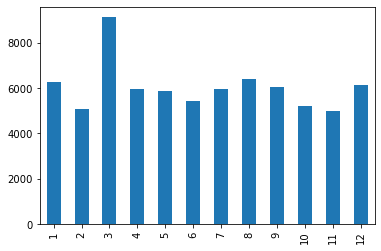

In [1161]:
df6.Month.value_counts(sort=False).plot(kind='bar')

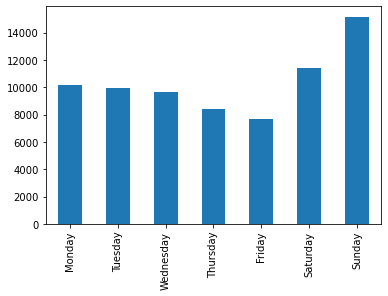

In [1162]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df6.weekday_name.value_counts(sort=False).loc[day_order].plot(kind='bar')

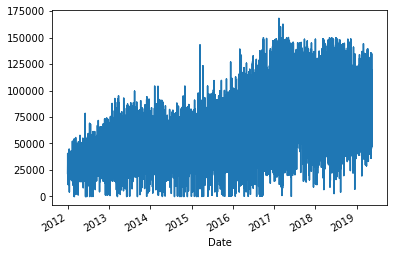

In [1163]:
df6['Price/Sqmt'].plot()

In [1164]:
df6.head()

,Transaction_ID,Community Name,Livable Area,Price/Sqmt,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration,Year,Month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,1,中关村南大街甲3号,56.30,38544.0,217.0,1965,2B,South,low,simple,2015,5,Friday
2012-04-10,2,中关村南大街甲3号,55.10,33667.0,185.5,1965,2B,South,first,other,2012,4,Tuesday
2019-04-19,3,民族大学南路19号院,70.00,91429.0,640.0,1993,2B,South,middle,simple,2019,4,Friday
2019-04-07,4,民族大学南路19号院,98.49,102752.0,1012.0,2000,2B,South,high,simple,2019,4,Sunday
2019-02-22,5,民族大学南路19号院,60.70,98847.0,600.0,1991,2B,South,high,other,2019,2,Friday


In [1165]:
df7 = df6.rename(columns={"Price/Sqmt": "price_per_sqmt", "Transaction_ID": "transaction_id", "Community Name": "community_name", "Livable Area": 'livable_area', "Price": 'price', "Year Built": "year_built", "Floor Plan": "floor_plan", "Facing Direction": "facing_direction", "Floor Level": "floor_level", "Decoration": "decoration", "Year": "year", "Month": "month"})

In [1166]:
df7.head()

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,1,中关村南大街甲3号,56.30,38544.0,217.0,1965,2B,South,low,simple,2015,5,Friday
2012-04-10,2,中关村南大街甲3号,55.10,33667.0,185.5,1965,2B,South,first,other,2012,4,Tuesday
2019-04-19,3,民族大学南路19号院,70.00,91429.0,640.0,1993,2B,South,middle,simple,2019,4,Friday
2019-04-07,4,民族大学南路19号院,98.49,102752.0,1012.0,2000,2B,South,high,simple,2019,4,Sunday
2019-02-22,5,民族大学南路19号院,60.70,98847.0,600.0,1991,2B,South,high,other,2019,2,Friday


In [1167]:
df7[df7.isna().T.any()]

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2017-09-18,257,法华寺小区,47.56,87679.0,417.0,NaN,1B,East/West,NaN,NaN,2017,9,Monday
2017-03-07,258,法华寺小区,73.51,87063.0,640.0,NaN,2B,North,NaN,NaN,2017,3,Tuesday
2018-04-29,275,广源闸,43.08,86351.0,372.0,NaN,1B,South,NaN,NaN,2018,4,Sunday
2018-04-28,276,广源闸,55.44,85678.0,475.0,NaN,2B,South,NaN,NaN,2018,4,Saturday
2017-09-15,287,民族印刷厂宿舍,50.50,106535.0,538.0,NaN,2B,South,NaN,NaN,2017,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-18,72145,双榆树东里,64.00,90000.0,576.0,NaN,2B,North,NaN,NaN,2017,2,Saturday
2017-01-18,72148,双榆树东里,66.90,92377.0,618.0,NaN,3B,South,NaN,NaN,2017,1,Wednesday
2017-01-09,72150,双榆树东里,50.80,98031.0,498.0,NaN,2B,South,NaN,NaN,2017,1,Monday


In [1168]:
df7.isnull().sum(axis=0) 

transaction_id         0
community_name         0
livable_area           0
price_per_sqmt         0
price                  0
year_built          7155
floor_plan             0
facing_direction      70
floor_level         3121
decoration          2939
year                   0
month                  0
weekday_name           0
dtype: int64

In [1169]:
df7[df7.isnull().T.any()]

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2017-09-18,257,法华寺小区,47.56,87679.0,417.0,NaN,1B,East/West,NaN,NaN,2017,9,Monday
2017-03-07,258,法华寺小区,73.51,87063.0,640.0,NaN,2B,North,NaN,NaN,2017,3,Tuesday
2018-04-29,275,广源闸,43.08,86351.0,372.0,NaN,1B,South,NaN,NaN,2018,4,Sunday
2018-04-28,276,广源闸,55.44,85678.0,475.0,NaN,2B,South,NaN,NaN,2018,4,Saturday
2017-09-15,287,民族印刷厂宿舍,50.50,106535.0,538.0,NaN,2B,South,NaN,NaN,2017,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-18,72145,双榆树东里,64.00,90000.0,576.0,NaN,2B,North,NaN,NaN,2017,2,Saturday
2017-01-18,72148,双榆树东里,66.90,92377.0,618.0,NaN,3B,South,NaN,NaN,2017,1,Wednesday
2017-01-09,72150,双榆树东里,50.80,98031.0,498.0,NaN,2B,South,NaN,NaN,2017,1,Monday


In [1170]:
df7[df7['community_name']=='万寿寺北里'].head(60)

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2019-03-27,592,万寿寺北里,60.0,79334.0,476.0,1983,2B,East/West,high,refined,2019,3,Wednesday
2019-03-24,593,万寿寺北里,36.6,97268.0,356.0,1982,1B,South,middle,other,2019,3,Sunday
2019-01-08,594,万寿寺北里,51.2,83204.0,426.0,1982,2B,South,first,other,2019,1,Tuesday
2019-01-06,595,万寿寺北里,54.9,78871.0,433.0,1981,2B,South,top,refined,2019,1,Sunday
2018-12-20,596,万寿寺北里,57.4,79443.0,456.0,1981,2B,South,middle,other,2018,12,Thursday
2018-12-09,597,万寿寺北里,69.2,76301.0,528.0,1983,3B,East/West,top,refined,2018,12,Sunday
2018-11-20,598,万寿寺北里,57.5,83131.0,478.0,1981,2B,South,top,simple,2018,11,Tuesday
2018-11-06,599,万寿寺北里,50.6,87313.0,441.8,1981,2B,South,middle,other,2018,11,Tuesday
2018-10-24,600,万寿寺北里,53.9,87199.0,470.0,1981,3B,South,first,simple,2018,10,Wednesday


In [1171]:
df7['year_built'].fillna(method='pad',axis=0)

Date
2015-05-08    1965
2012-04-10    1965
2019-04-19    1993
2019-04-07    2000
2019-02-22    1991
              ... 
2012-04-15    1990
2012-03-04    1985
2012-02-26    1985
2012-02-26    1985
2012-01-05    1990
Name: year_built, Length: 72386, dtype: object

In [1172]:
df8 = df7

In [1173]:
df8['year_built'] = df8['year_built'].fillna(method='pad',axis=0)

In [1174]:
df8[df8.isnull().T.any()]

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2017-09-18,257,法华寺小区,47.56,87679.0,417.0,1994,1B,East/West,NaN,NaN,2017,9,Monday
2017-03-07,258,法华寺小区,73.51,87063.0,640.0,1994,2B,North,NaN,NaN,2017,3,Tuesday
2018-04-29,275,广源闸,43.08,86351.0,372.0,1999,1B,South,NaN,NaN,2018,4,Sunday
2018-04-28,276,广源闸,55.44,85678.0,475.0,1999,2B,South,NaN,NaN,2018,4,Saturday
2017-09-15,287,民族印刷厂宿舍,50.50,106535.0,538.0,1990,2B,South,NaN,NaN,2017,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-03,72134,双榆树东里,52.90,104442.0,552.0,1985,2B,South,NaN,NaN,2017,3,Friday
2017-02-18,72145,双榆树东里,64.00,90000.0,576.0,1985,2B,North,NaN,NaN,2017,2,Saturday
2017-01-18,72148,双榆树东里,66.90,92377.0,618.0,1996,3B,South,NaN,NaN,2017,1,Wednesday


In [1175]:
df8.head()

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,1,中关村南大街甲3号,56.30,38544.0,217.0,1965,2B,South,low,simple,2015,5,Friday
2012-04-10,2,中关村南大街甲3号,55.10,33667.0,185.5,1965,2B,South,first,other,2012,4,Tuesday
2019-04-19,3,民族大学南路19号院,70.00,91429.0,640.0,1993,2B,South,middle,simple,2019,4,Friday
2019-04-07,4,民族大学南路19号院,98.49,102752.0,1012.0,2000,2B,South,high,simple,2019,4,Sunday
2019-02-22,5,民族大学南路19号院,60.70,98847.0,600.0,1991,2B,South,high,other,2019,2,Friday


In [1176]:
df8.isnull().sum(axis=0) 

transaction_id         0
community_name         0
livable_area           0
price_per_sqmt         0
price                  0
year_built             0
floor_plan             0
facing_direction      70
floor_level         3121
decoration          2939
year                   0
month                  0
weekday_name           0
dtype: int64

In [1177]:
df8[df8.isna().T.any()]

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2017-09-18,257,法华寺小区,47.56,87679.0,417.0,1994,1B,East/West,NaN,NaN,2017,9,Monday
2017-03-07,258,法华寺小区,73.51,87063.0,640.0,1994,2B,North,NaN,NaN,2017,3,Tuesday
2018-04-29,275,广源闸,43.08,86351.0,372.0,1999,1B,South,NaN,NaN,2018,4,Sunday
2018-04-28,276,广源闸,55.44,85678.0,475.0,1999,2B,South,NaN,NaN,2018,4,Saturday
2017-09-15,287,民族印刷厂宿舍,50.50,106535.0,538.0,1990,2B,South,NaN,NaN,2017,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-03,72134,双榆树东里,52.90,104442.0,552.0,1985,2B,South,NaN,NaN,2017,3,Friday
2017-02-18,72145,双榆树东里,64.00,90000.0,576.0,1985,2B,North,NaN,NaN,2017,2,Saturday
2017-01-18,72148,双榆树东里,66.90,92377.0,618.0,1996,3B,South,NaN,NaN,2017,1,Wednesday


In [1178]:
df8['decoration'].value_counts()

refined    26183
simple     21356
other      20901
bare        1007
Name: decoration, dtype: int64

In [1179]:
df8['decoration'].unique()

array(['simple', 'other', 'refined', 'bare', nan], dtype=object)

In [1180]:
df8['decoration'].isnull().sum()

2939

In [1181]:
df8.isnull().sum(axis=0) 

transaction_id         0
community_name         0
livable_area           0
price_per_sqmt         0
price                  0
year_built             0
floor_plan             0
facing_direction      70
floor_level         3121
decoration          2939
year                   0
month                  0
weekday_name           0
dtype: int64

In [1182]:
df9 = df8[['price_per_sqmt','facing_direction','floor_level','decoration']]

In [1183]:
df9.isnull().sum(axis=0) 

price_per_sqmt         0
facing_direction      70
floor_level         3121
decoration          2939
dtype: int64

In [1184]:
df9 = df9.fillna("NA")

In [1185]:
df9.isnull().sum(axis=0) 

price_per_sqmt      0
facing_direction    0
floor_level         0
decoration          0
dtype: int64

In [1186]:
df9.to_csv("df9.csv", sep=',', header=True,index=False)

In [1189]:
df10 = pd.read_csv("/Users/Reinhard/702_Statistical_Modelling_Final_Project/d1_imp.csv")

In [1190]:
df10.head()

,Unnamed: 0,price_per_sqmt,facing_direction,floor_level,decoration
0,1,38544.0,South,low,simple
1,2,33667.0,South,first,other
2,3,91429.0,South,middle,simple
3,4,102752.0,South,high,simple
4,5,98847.0,South,high,other


In [1191]:
df10.isnull().sum(axis=0) 

Unnamed: 0          0
price_per_sqmt      0
facing_direction    0
floor_level         0
decoration          0
dtype: int64

In [1192]:
df10 = df10[['price_per_sqmt','facing_direction','floor_level','decoration']]

In [1193]:
df10.head()

,price_per_sqmt,facing_direction,floor_level,decoration
0,38544.0,South,low,simple
1,33667.0,South,first,other
2,91429.0,South,middle,simple
3,102752.0,South,high,simple
4,98847.0,South,high,other


In [1209]:
df11 = df10[['facing_direction','floor_level','decoration']]

In [1210]:
df11.count()

facing_direction    72386
floor_level         72386
decoration          72386
dtype: int64

In [1196]:
df8.head()

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,1,中关村南大街甲3号,56.30,38544.0,217.0,1965,2B,South,low,simple,2015,5,Friday
2012-04-10,2,中关村南大街甲3号,55.10,33667.0,185.5,1965,2B,South,first,other,2012,4,Tuesday
2019-04-19,3,民族大学南路19号院,70.00,91429.0,640.0,1993,2B,South,middle,simple,2019,4,Friday
2019-04-07,4,民族大学南路19号院,98.49,102752.0,1012.0,2000,2B,South,high,simple,2019,4,Sunday
2019-02-22,5,民族大学南路19号院,60.70,98847.0,600.0,1991,2B,South,high,other,2019,2,Friday


In [1204]:
# df12 = ~df8[['facing_direction','floor_level','decoration']]

# df12 = df8[['price_per_sqmt','transaction_id','community_name','livable_area','price','year_built','floor_plan','year','month','weekday_name']]

df12 = df8


In [1205]:
df12.count()

transaction_id      72386
community_name      72386
livable_area        72386
price_per_sqmt      72386
price               72386
year_built          72386
floor_plan          72386
facing_direction    72316
floor_level         69265
decoration          69447
year                72386
month               72386
weekday_name        72386
dtype: int64

In [1206]:
df12.isnull().sum(axis=0) 

transaction_id         0
community_name         0
livable_area           0
price_per_sqmt         0
price                  0
year_built             0
floor_plan             0
facing_direction      70
floor_level         3121
decoration          2939
year                   0
month                  0
weekday_name           0
dtype: int64

In [1211]:
df11.isnull().sum()

facing_direction    0
floor_level         0
decoration          0
dtype: int64

In [1225]:
df11.head()

,facing_direction,floor_level,decoration
0,South,low,simple
1,South,first,other
2,South,middle,simple
3,South,high,simple
4,South,high,other


In [1226]:
df12['facing_direction'] = df11['facing_direction'].values

In [1227]:
df12['floor_level'] = df11['floor_level'].values

In [1228]:
df12['decoration'] = df11['decoration'].values

In [1229]:
df12.isnull().sum(axis=0) 

transaction_id      0
community_name      0
livable_area        0
price_per_sqmt      0
price               0
year_built          0
floor_plan          0
facing_direction    0
floor_level         0
decoration          0
year                0
month               0
weekday_name        0
dtype: int64

In [1230]:
df12[df12.isna().T.any()]

,transaction_id,community_name,livable_area,price_per_sqmt,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,


In [1232]:
df12['decoration'].head()

Date
2015-05-08    simple
2012-04-10     other
2019-04-19    simple
2019-04-07    simple
2019-02-22     other
Name: decoration, dtype: object

In [1235]:
# Encode Decoration into categorical variables
# 毛坯 = 0，简装 = 0， 精装 = 1，  其他 = 0 (we need to drop 暂无信息)
df12.loc[df12['decoration'] == 'refined' , 'decoration'] = 'refined'
df12.loc[df12['decoration'] == 'bare' , 'decoration'] = 'simple'
df12.loc[df12['decoration'] == 'simple' , 'decoration'] = 'simple'
df12.loc[df12['decoration'] == 'other' , 'decoration'] = 'simple'

In [1236]:
df12.to_csv("df12.csv", sep=',', header=True,index=False)